# Brain Tumor Detection

### For Google Colab Users

In [ ]:
#@title ## Mount Your Google Drive & Map your Directory
#@markdown Please run this cell (`Ctrl+Enter` or `Shift+Enter`) and follow the steps printed bellow.
import os

from google.colab import drive
drive.mount('/content/gdrive')

# check Google Drive is mounted
if not os.path.isdir("/content/gdrive"):
  raise FileNotFoundError("Your Google Drive isn't mounted. Please run the above cell.")

assignment_dir = "/content/gdrive/MyDrive/workspace/BrainTumorDetection"  #@param{type:"string"}
assignment_dest = "/content/project"

# create symbolic link
!rm -f {assignment_dest}
!ln -s "{assignment_dir}" "{assignment_dest}"
print(f'Succesfully mapped (ln -s) "{assignment_dest}" -> "{assignment_dir}"')

# cd to linked dir
%cd -q {assignment_dest}
print(f'Succesfully changed directory (cd) to "{assignment_dest}"')

Mounted at /content/gdrive
Succesfully mapped (ln -s) "/content/project" -> "/content/gdrive/MyDrive/workspace/BrainTumorDetection"
Succesfully changed directory (cd) to "/content/project"


### Init

In [1]:
#@title ##Init

#@markdown Import required modules and observe your resources

# auto reload
%load_ext autoreload
%autoreload 2

# import
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
import wandb
wandb.login()

from experiment import Experiment
from network import get_model_and_optim

# Show resources
!nvidia-smi

wandb: Currently logged in as: antebi-itai (use `wandb login --relogin` to force relogin)


Sat Jul  3 17:35:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.102.04   Driver Version: 450.102.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:85:00.0 Off |                    0 |
| N/A   34C    P0    41W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Experiment

wandb: wandb version 0.10.33 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


loading best model from: ./Models/vgg19.pth


  0%|          | 0/256 [00:00<?, ?it/s]

Model's accuracy:  tensor(0.9274, device='cuda:0')
Creating heatmap...


100%|██████████| 256/256 [02:22<00:00,  1.80it/s]


> /home/labs/waic/itaian/BrainTumorDetection/experiment.py(105)generate_heatmap()
    103         for channel, heatmap in features.items():
    104             import pdb; pdb.set_trace()
--> 105             binary_heatmap = normalize_numpy(torch.cat(heatmap).reshape((height, width)).cpu().numpy())
    106             colorful_heatmap = cv2.applyColorMap(binary_heatmap, cv2.COLORMAP_JET)
    107             heatmaps[channel] = binary_heatmap



ipdb>  n


> /home/labs/waic/itaian/BrainTumorDetection/experiment.py(106)generate_heatmap()
    104             import pdb; pdb.set_trace()
    105             binary_heatmap = normalize_numpy(torch.cat(heatmap).reshape((height, width)).cpu().numpy())
--> 106             colorful_heatmap = cv2.applyColorMap(binary_heatmap, cv2.COLORMAP_JET)
    107             heatmaps[channel] = binary_heatmap
    108             overlay_heatmaps[channel] = 0.5 * colorful_heatmap + \



ipdb>  n


> /home/labs/waic/itaian/BrainTumorDetection/experiment.py(107)generate_heatmap()
    105             binary_heatmap = normalize_numpy(torch.cat(heatmap).reshape((height, width)).cpu().numpy())
    106             colorful_heatmap = cv2.applyColorMap(binary_heatmap, cv2.COLORMAP_JET)
--> 107             heatmaps[channel] = binary_heatmap
    108             overlay_heatmaps[channel] = 0.5 * colorful_heatmap + \
    109                                         0.5 * normalize_numpy(original_image.squeeze().permute(1, 2, 0).cpu().numpy())



ipdb>  from matplotlib import pyplot as plt
ipdb>  plt.imshow(binary_heatmap, cmap="gray"); plt.show()


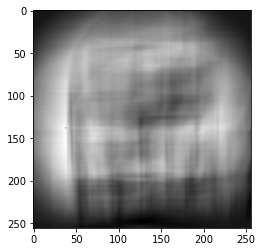

ipdb>  plt.imshow(colorful_heatmap); plt.show()


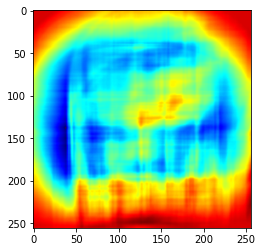

ipdb>  binary_heatmap.min()


0


ipdb>  binary_heatmap.max()


255


ipdb>  colorful_heatmap.min()


0


ipdb>  colorful_heatmap.max()


255


ipdb>  im = normalize_numpy(original_image.squeeze().permute(1, 2, 0).cpu().numpy())
ipdb>  im.min()


0


ipdb>  im.max()


254


ipdb>  n


> /home/labs/waic/itaian/BrainTumorDetection/experiment.py(108)generate_heatmap()
    106             colorful_heatmap = cv2.applyColorMap(binary_heatmap, cv2.COLORMAP_JET)
    107             heatmaps[channel] = binary_heatmap
--> 108             overlay_heatmaps[channel] = 0.5 * colorful_heatmap + \
    109                                         0.5 * normalize_numpy(original_image.squeeze().permute(1, 2, 0).cpu().numpy())
    110 



ipdb>  n


> /home/labs/waic/itaian/BrainTumorDetection/experiment.py(109)generate_heatmap()
    107             heatmaps[channel] = binary_heatmap
    108             overlay_heatmaps[channel] = 0.5 * colorful_heatmap + \
--> 109                                         0.5 * normalize_numpy(original_image.squeeze().permute(1, 2, 0).cpu().numpy())
    110 
    111         # Log heatmaps



ipdb>  n


> /home/labs/waic/itaian/BrainTumorDetection/experiment.py(108)generate_heatmap()
    106             colorful_heatmap = cv2.applyColorMap(binary_heatmap, cv2.COLORMAP_JET)
    107             heatmaps[channel] = binary_heatmap
--> 108             overlay_heatmaps[channel] = 0.5 * colorful_heatmap + \
    109                                         0.5 * normalize_numpy(original_image.squeeze().permute(1, 2, 0).cpu().numpy())
    110 



ipdb>  n


> /home/labs/waic/itaian/BrainTumorDetection/experiment.py(103)generate_heatmap()
    101         heatmaps = {}
    102         overlay_heatmaps = {}
--> 103         for channel, heatmap in features.items():
    104             import pdb; pdb.set_trace()
    105             binary_heatmap = normalize_numpy(torch.cat(heatmap).reshape((height, width)).cpu().numpy())



ipdb>  overlay_heatmaps.keys()


dict_keys(['L2C55'])


ipdb>  hm = overlay_heatmaps['L2C55']
ipdb>  plt.imshow(hm); plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


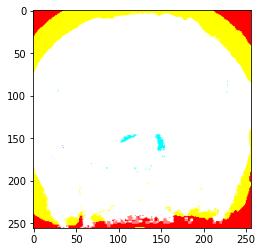

ipdb>  plt.imshow(hm / 255); plt.show()


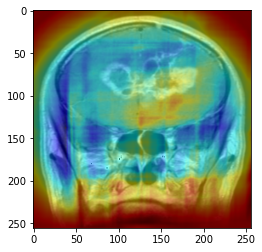

ipdb>  pdb.set_trace = lambda: None
ipdb>  c


Test/accuracy/no,0.98077
_runtime,427
_timestamp,1625326840
_step,263
Test/accuracy/yes,0.92958
Test/accuracy,0.9433
memory/usage,7571.5332


Test/accuracy/no,▁█
_runtime,▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃█
_timestamp,▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃█
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
Test/accuracy/yes,▁█
Test/accuracy,▁█
memory/usage,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [7]:
# params
config = {
"model_name": "vgg19",
"data_train_path": os.path.join(".", "Data", "Training"),
"data_test_path": os.path.join(".", "Data", "Testing"),
"epochs": 3,
"train_batch_size": 200,
"lr": 1e-4,
"heatmap_batch_size": 256,
"occlusion_size": (60,60),
"heat_layers" : [2, 5, 10, 12, 14, 16, 19, 23, 25, 28, 34],
"shuffle_data": True,
"device": "cuda"
}
with wandb.init(project="BrainTumorDetection", config=config):
    experiment = Experiment(config)
    # experiment.train_model()
    print("Model's accuracy: ", experiment.eval_model())
    heatmaps = experiment.generate_heatmap(r"./Data/Testing/glioma_tumor/image.jpg")